# Лабораторная работа №14 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Содержательная постановка задачи 
В данной работе рассматривается способ разрешения кризиса неплатежей
предприятий, т. е. способ погашения взаимных долгов, возникший в результате
несовершенства процедуры расчетов.
* Идеализация модели


  При рассмотрении данной модели предполагается, что:
  
1. Кризис неплатежей порожден лишь несовершенством процедуры расчетов, а не какими-то экономическими факторами;
2. Все долги известны и признаются предприятиями;
3. При проведении взаимозачёта сальдо (баланс кредитов и долгов) предприятий остаются неизменными;
4. Часть долгов списывается, а часть переадресовывается, т.е. у предприятий могут появиться новые должники и кредиторы и исчезнуть часть старых.

# 2. Концептуальная постановка задачи 
Данная модель описывается следующими переменными:
N - число предприятий;


$x_{nm} $- долг n-го предприятия m-му, где $1<=n , m<= N$ ($x_{nm}<0 $ , если первое предприятие должно второму  , и $x_{nm}>0$  в обратном случае ) 
 
$ x_n=>0 $- индивидуальные свободные средства n-го предприятия;


X - сумма всех взаимных долгов;


$X_0$- сумма всех свободных средств предприятий;


$S_n $- баланс кредитов и долгов (сальдо) n-го предприятия;


S- суммарное абсолютное сальдо системы.

# 3. Математическая постановка задачи 

Совокупность долгов описывается кососимметричной матрицей размера NxN с нулевой диагональю.Сумма всех взаимных долгов вычисляется через индивидуальные долги как 

$ X = \sum_{n=1}^{N}\sum_{m=1}^{N}|x_{nm}|$ ,

X служит одной из количественных характеристик финансового положения системы. Если она сопоставима с суммой всех свободных средств предприятий $ X_0$ , т.е

$ X=>X_0 = \sum_{n=1}^{N}x_n$ 

то описываемая этим неравенством ситуация и означает кризис неплатежей.
Баланс кредитов и долгов (сальдо) каждого предприятия рассчитывается как 

$S_n = \sum_{m=1}^{N}x_{nm} $ 

При $  S_0 > 0 $ предприятие является в некотором смысле кредитором предприятий-должников, т.е. тех, у кого $S_0 < 0$ . При $ S_0 = 0 $ предприятие в отношении долгов «нейтрально». При $ |S_0| < x_n$ индивидуальное финансовое состояние предприятия нормальное, поскольку его реальные суммарные долги меньше его свободных средств.Суммарное абсолютное сальдо системы рассчитывается как

$ S = \sum_{n=1}^{N}|S_n| $

Если $ S< X_0$ , то свободных средств в системе больше, чем долгов, и она может успешно функционировать дальше.

Между величинами X и S всегда существует определенное соотношение. Для
любой произвольной матрицы долгов выполняется неравенство 

$ X => S $ 

т.е. суммарный долг не может быть меньше суммарного сальдо.

Задача погашения взаимных долгов состоит в том, чтобы, зная матрицу $ x_{nm}'$ , найти матрицу $ x_{nm}$ «новых» долгов, для которой выполнялось бы $ X' < X $ ( идеально $ X' = S$ ) Суть макропроцедуры взаимозачёта состоит в том, что вместо величин $ x_{nm} $ рассматриваются $ S_{n'} $ . Предприятия с $ S_n < 0 $ считаются должниками, а предприятия с $ S_n > 0$  - кредиторами. Затем долги предприятий-должников каким-то образом распределяются между кредиторами, т.е находится новая система долгов
выполняется $ x_{nm}'$ . При этом выполняется 

$ \sum_{n=1}^{N}S_n = 0$ 

и достигается равенство $ X' = S $ . Такое решение задачи является оптимальным.Одно из оптимальных решений задаётся формулой, по которой новые долги вычисляются через старые:

$ x_{nm}' = \frac{S_n|S_m| - S_m|S_n|}{5} $ 


Согласно этому алгоритму долг любого прелприятия расписывается по предприятиям-кредиторам в долях , пропорциональных величинам их сальдо . Предприятиям с большим положительным сальдо причитается от каждого из должников большая часть его долгов . Для предприятий с нулевым сальдо взаимозачёт сводится к погашению всех их долгов и всех долгов им . 

# Реализация 

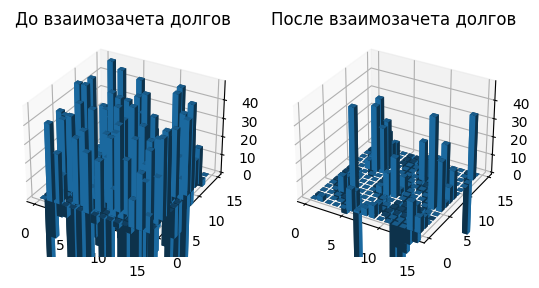

In [4]:
N = 15
debt_space = [-50, 50]
debtMat = np.zeros((N, N))

for i in range(N):
    for j in range(N):
        if i == j:
            debtMat[i, j] = 0
        if j < i:
            debtMat[i, j] = debt_space[0] + (debt_space[1] - debt_space[0]) * np.random.rand()
            debtMat[j, i] = -debtMat[i, j]

Sn = np.sum(debtMat, axis=1)
S = np.sum(np.abs(Sn))
Sm = np.sum(debtMat, axis=0)
X = np.zeros((N, N))

for i in range(N):
    for j in range(i):
        X[i, j] = (Sn[i] * np.abs(Sm[j]) - Sm[j] * np.abs(Sn[i])) / S
        X[j, i] = -X[i, j]


fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_title('До взаимозачета долгов')
xpos, ypos = np.meshgrid(np.arange(N), np.arange(N), indexing='ij')
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = np.zeros(N * N)
dx = dy = 0.75
dz = debtMat.ravel()
ax1.bar3d(xpos, ypos, zpos, dx, dy, dz)


ax2 = fig.add_subplot(122, projection='3d')
ax2.set_title('После взаимозачета долгов')
dz = X.ravel()
ax2.bar3d(xpos, ypos, zpos, dx, dy, dz)

plt.show()
